In [1]:
import numpy as np
import pandas as pd
import re, os, sys
import matplotlib.pyplot as plt

# 1.0 Data Load

In [2]:
# path = '/home/k1896084/Documents/Semester 2/Thesis/PMEmo/PMEmo/Annotations/Arousal/'
path = '/Volumes/Seagate Expansion Drive/PMEmo dataset/PMEmo/PMEmo/Annotations/Arousal/'

filenames = os.listdir(path)

In [3]:
def load_annotations(filenames):
    """load indivudual annotation csv files into DataFrame"""
    annotations = []

    for fid in filenames:
            annotation = np.loadtxt(open(path+fid, 'r'), delimiter=',', skiprows=1)
            entry = [fid, annotation[:, 1], annotation[:, 2:]]
            annotations.append(entry)

    return pd.DataFrame(annotations, columns=['File_ID', 'static', 'dynamic'])

In [4]:
# load Arousal annotations

A_annotations = load_annotations(filenames)

In [5]:
# path = '/home/k1896084/Documents/Semester 2/Thesis/PMEmo/PMEmo/Annotations/Valence/'
path = '/Volumes/Seagate Expansion Drive/PMEmo dataset/PMEmo/PMEmo/Annotations/Valence/'

filenames = os.listdir(path)

In [6]:
# load Valence annotations

V_annotations = load_annotations(filenames)

## 1.1 Exploratory Analysis

In [7]:
def descriptive_stats(segments):
    """
    calculate descriptive statistics for annotation dataframes on row-wise and column-wise basis, 
    as in Fig. 7 of report
    """
    
    col_stats = []
    row_stats = []
    derived_stats = []

    for fid in segments['File_ID']:
        annotations = segments[segments['File_ID']==fid]['dynamic'].iloc[0]
        
        ### dynamic stats by column ### 

        # dynamic column means (mean emotion at time=t)
        col_mu = annotations.mean(axis=0)
        
        # dynamic column variances (level of disagreement in an annotation)
        col_vars = annotations.var(axis=0)
        
        col_entry = [fid, col_mu, col_vars]
        
        ### dynamic stats by row ### 

        # dynamic row means (overall mean emotion in a clip, per respondent. Ought to be comparable with static annotation values.)
        row_mu = annotations.mean(axis=1)
        
        # dynamic row variances (amount of variability in emotions portrayed throughout clip, per respondent)
        row_vars = annotations.var(axis=1)
        
        row_entry = [fid, row_mu, row_vars]
        
        ### derived stats of dynamic annotations ### 
        
        # mean of dynamic column means (average arousal/valence in a clip (at any one time?))
        mean_col_mu = col_mu.mean()
        
        # variance of dynamic column means (variability of A/V from the mean of col means at any point in time)
        var_col_mu = col_mu.var()
        
        # mean of dynamic column variances (i.e. average disagreement in a single time step annotation;
        # amount of noise around 'true' signal? average difficulty in annotation per time step?)
        mean_col_vars = col_vars.mean()
        
        # variance of dynamic column variances (variability in ambiguity of emotion in a track)
        var_col_vars = col_vars.var()
        
        # mean of dynamic row means (average overall emotion in a clip, comparable to mean of static annotations)
        mean_row_mu = row_mu.mean()
        
        # variance of row means (level of disagreement between respondents in overall emotion of clip)
        var_row_mu = row_mu.var()
        
        # mean of row variances (average level of emotion variation over course of a clip) 
        mean_row_vars = row_vars.mean()
        
        # variance of row variances (level of disagreement between respondents over variability of emotion in clip)
        var_row_vars = row_vars.var()
        
        derived_entry = [fid, mean_col_mu, var_col_mu, mean_col_vars, var_col_vars, mean_row_mu, var_row_mu, mean_row_vars, var_row_vars]
        
        col_stats.append(col_entry)
        
        row_stats.append(row_entry)
    
        derived_stats.append(derived_entry)        
    
    return pd.DataFrame(col_stats, columns=['File_ID', 'col_means', 'col_vars']), pd.DataFrame(row_stats, columns=['File_ID', 'row_means', 'row_vars']), pd.DataFrame(derived_stats, columns=['File_ID', 'mean_col_mu', 'var_col_mu', 'mean_col_vars', 'var_col_vars', 'mean_row_mu', 'var_row_mu', 'mean_row_vars', 'var_row_vars'])
    
        

In [8]:
# arousal descriptive stats

A_column_stats, A_row_stats, A_derived_stats = descriptive_stats(A_annotations)

In [9]:
# valence descriptive stats

V_column_stats, V_row_stats, V_derived_stats = descriptive_stats(V_annotations)

Average length of clips

In [10]:
# Average number of samples in dynamic annotations = 47.5

# Arousal
cusum = 0

for i in A_column_stats['col_means']:
    cusum += len(i)
    
cusum/len(A_column_stats)

47.50456323337679

In [11]:
# Valence: 0.02 difference due to 0.5s (1 timestep value) length discrepancies in the following 20/767 files:
# [1, 2, 5, 16, 18, 19, 20, 23, 27, 32, 33, 34, 41, 42, 43, 55, 66, 107, 130, 157]

cusum = 0

for i in V_column_stats['col_means']:
    cusum += len(i)
    
cusum/len(V_column_stats)

47.52542372881356

Distribution of annotations

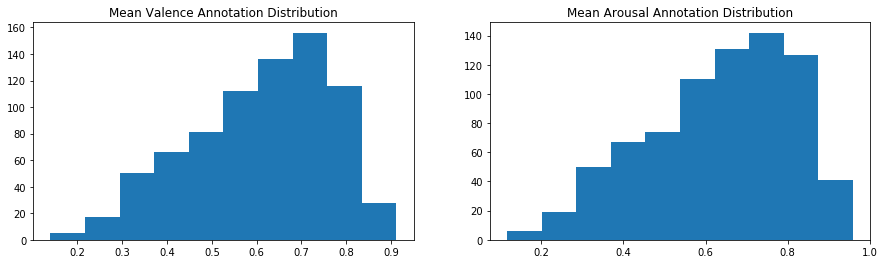

In [12]:
# left-skewed distribution => median and IQR rather than mean and s.d.

fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].hist((V_derived_stats['mean_row_mu']))
ax[0].set_title('Mean Valence Annotation Distribution')
ax[1].hist((A_derived_stats['mean_row_mu']))
ax[1].set_title('Mean Arousal Annotation Distribution')
plt.show()


Plotting music emotion variation over time

In [13]:
def plot_signals(rand_ints):
    """plot average signals of four clips based on list of indices, as in Fig. 6 of report"""
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))
    ax[0,0].plot(A_column_stats['col_means'].iloc[rand_ints[0]])
    ax[0,0].set_title(A_column_stats.iloc[rand_ints[0]]['File_ID'])
    
    ax[0,1].plot(A_column_stats['col_means'].iloc[rand_ints[1]])
    ax[0,1].set_title(A_column_stats.iloc[rand_ints[1]]['File_ID'])
    
    ax[1,0].plot(A_column_stats['col_means'].iloc[rand_ints[2]])
    ax[1,0].set_title(A_column_stats.iloc[rand_ints[2]]['File_ID'])
    
    ax[1,1].plot(A_column_stats['col_means'].iloc[rand_ints[3]])
    ax[1,1].set_title(A_column_stats.iloc[rand_ints[3]]['File_ID'])
    
    fig.text(0.5, 0.04, 'time (s)', ha='center', va='center')
    fig.text(0.06, 0.5, 'mean dynamic arousal', ha='center', va='center', rotation='vertical')

    plt.show()

In [14]:
# randomly generate four indices 

rand_ints = [np.random.randint(len(A_column_stats)) for i in range(4)]

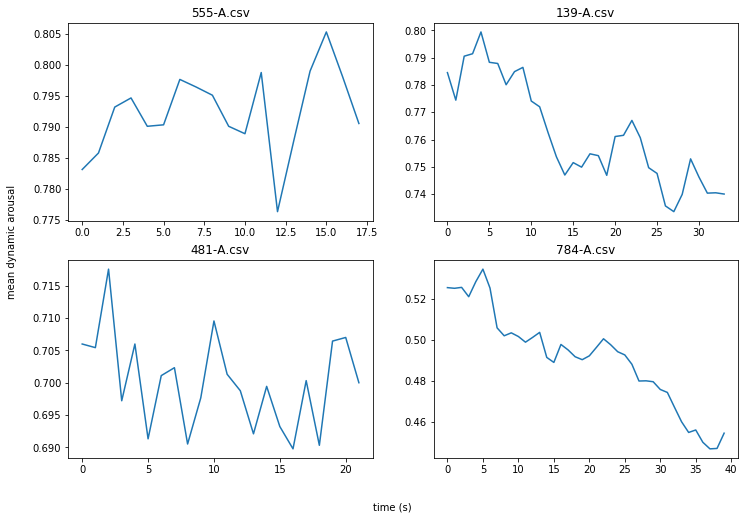

In [15]:
# files chosen for plotting in report: [753, 312, 413, 757]
plot_signals(rand_ints)

Heatmap of A/V values to check if data biased

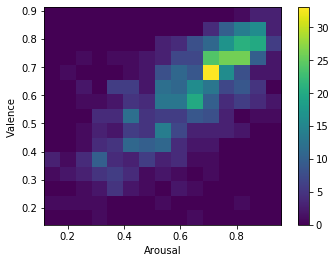

In [16]:
x = A_derived_stats['mean_row_mu']
y = V_derived_stats['mean_row_mu']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=15)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.colorbar()
plt.xlabel('Arousal')
plt.ylabel('Valence')
plt.show()

# 2.0 Segmentation

## 2.1 Synthetic signal and parameterisation

In [17]:
import ruptures as rpt

In [18]:
# using the mean of the variance per dynamic time step as a proxy for how much 'noise' is in the signal of a track's
# annotations in order to get a sigma value for changepoint detection

# average amount of variance in arousal annotation per dynamic time step = 0.09215330048169802
ave_dyn_var = A_derived_stats['mean_col_vars'].mean()

# => average s.d. = 0.303567620937573
ave_dyn_sd = np.sqrt(ave_dyn_var)

In [19]:
# average signal parameters for synthetic signal
delta = np.median(A_derived_stats['mean_row_mu'])
diff = np.diff(np.quantile(A_derived_stats['mean_row_mu'], (0.25, 0.75)))

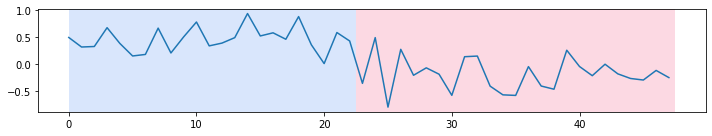

In [20]:
# calculate synthetic signal based on ave_num_samples=48 and s.d. as noise

n = 48
sigma = ave_dyn_sd

signal, bkps = rpt.pw_constant(n, 1, 1, noise_std=sigma, delta=((delta-diff), (delta+diff)))
rpt.display(signal, bkps)
plt.show()

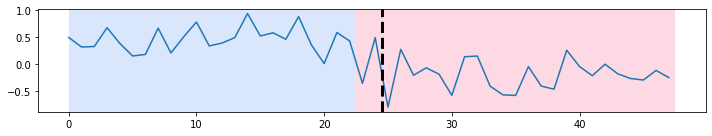

In [21]:
# change point detection

# PELT algo

pen = np.log(n)*sigma**2
model = "l1"  # "l2", "rbf"
PELT = rpt.Pelt(model=model, min_size=10).fit(signal)
my_bkps = PELT.predict(pen=pen)

# show results
fig, (ax,) = rpt.display(signal, bkps, my_bkps)
plt.show()

In [22]:
# actual vs. predicted changepoints

print('actual: %s \npredicted: %s'%(bkps, my_bkps))

actual: [23, 48] 
predicted: [25, 48]


In [23]:
from ruptures.metrics import randindex

# evaluation of signal segmentation
n = 48
sigma = ave_dyn_sd
pen = np.log(n)*sigma**2
r_i = []

for i in range(1000):
    
    signal, bkps = rpt.pw_constant(n, 1, 1, noise_std=sigma, delta=((delta-diff), (delta+diff)))
    model = "l1"  # "l2", "rbf"
    PELT = rpt.Pelt(model=model, min_size=10).fit(signal)
    my_bkps = PELT.predict(pen=pen)
    r_i.append(randindex(bkps, my_bkps))

    
np.mean(r_i)

0.8775850694444445

## 2.2 Segmentation

In [24]:

def breakpoints(filenames, column_stats, derived_stats, model):
    """predict breakpoint locations in affective signals"""
    
    bkps = []
    problem_IDs = []
    sigma = np.sqrt(derived_stats['mean_col_vars'].mean())

    for fid in filenames:
        try:
            print('Segmenting '+fid)
            signal = column_stats[column_stats['File_ID']==fid]['col_means'].iloc[0]
            n = len(signal)
            pen = np.log(n)*sigma**2
            PELT = rpt.Pelt(model=model, min_size=10).fit(signal)
            breaks = PELT.predict(pen=pen)
            bkps.append([fid, breaks])
            print(fid+' Done')

        except ValueError:
            problem_IDs.append([fid, n])

    return pd.DataFrame(bkps, columns=['File_ID', 'bkps']), np.array(problem_IDs)
        #[('File_ID', 'U25'), ('bkps', 'O')]

#### Arousal

In [25]:
#path = '/home/k1896084/Documents/Semester 2/Thesis/PMEmo/PMEmo/Annotations/Arousal/'
path = '/Volumes/Seagate Expansion Drive/PMEmo dataset/PMEmo/PMEmo/Annotations/Arousal/'

filenames = os.listdir(path)

In [26]:
# arousal changepoint detection

A_bkps, A_problem_IDs = breakpoints(filenames, A_column_stats, A_derived_stats, 'l1')

Segmenting 1-A.csv
1-A.csv Done
Segmenting 10-A.csv
10-A.csv Done
Segmenting 100-A.csv
100-A.csv Done
Segmenting 1000-A.csv
1000-A.csv Done
Segmenting 102-A.csv
Segmenting 103-A.csv
103-A.csv Done
Segmenting 104-A.csv
104-A.csv Done
Segmenting 105-A.csv
105-A.csv Done
Segmenting 106-A.csv
106-A.csv Done
Segmenting 107-A.csv
107-A.csv Done
Segmenting 108-A.csv
108-A.csv Done
Segmenting 109-A.csv
109-A.csv Done
Segmenting 113-A.csv
113-A.csv Done
Segmenting 114-A.csv
114-A.csv Done
Segmenting 115-A.csv
115-A.csv Done
Segmenting 116-A.csv
116-A.csv Done
Segmenting 117-A.csv
117-A.csv Done
Segmenting 119-A.csv
119-A.csv Done
Segmenting 12-A.csv
12-A.csv Done
Segmenting 120-A.csv
120-A.csv Done
Segmenting 123-A.csv
123-A.csv Done
Segmenting 124-A.csv
124-A.csv Done
Segmenting 126-A.csv
126-A.csv Done
Segmenting 127-A.csv
127-A.csv Done
Segmenting 128-A.csv
128-A.csv Done
Segmenting 13-A.csv
13-A.csv Done
Segmenting 132-A.csv
132-A.csv Done
Segmenting 133-A.csv
133-A.csv Done
Segmenting 134-

446-A.csv Done
Segmenting 447-A.csv
447-A.csv Done
Segmenting 448-A.csv
448-A.csv Done
Segmenting 449-A.csv
449-A.csv Done
Segmenting 450-A.csv
450-A.csv Done
Segmenting 451-A.csv
451-A.csv Done
Segmenting 452-A.csv
452-A.csv Done
Segmenting 454-A.csv
454-A.csv Done
Segmenting 455-A.csv
455-A.csv Done
Segmenting 456-A.csv
456-A.csv Done
Segmenting 457-A.csv
457-A.csv Done
Segmenting 458-A.csv
458-A.csv Done
Segmenting 46-A.csv
46-A.csv Done
Segmenting 460-A.csv
460-A.csv Done
Segmenting 461-A.csv
461-A.csv Done
Segmenting 462-A.csv
462-A.csv Done
Segmenting 463-A.csv
463-A.csv Done
Segmenting 465-A.csv
465-A.csv Done
Segmenting 466-A.csv
466-A.csv Done
Segmenting 468-A.csv
468-A.csv Done
Segmenting 469-A.csv
469-A.csv Done
Segmenting 47-A.csv
47-A.csv Done
Segmenting 470-A.csv
470-A.csv Done
Segmenting 471-A.csv
471-A.csv Done
Segmenting 472-A.csv
472-A.csv Done
Segmenting 476-A.csv
476-A.csv Done
Segmenting 477-A.csv
477-A.csv Done
Segmenting 478-A.csv
478-A.csv Done
Segmenting 479-A.

708-A.csv Done
Segmenting 71-A.csv
71-A.csv Done
Segmenting 710-A.csv
710-A.csv Done
Segmenting 711-A.csv
711-A.csv Done
Segmenting 713-A.csv
713-A.csv Done
Segmenting 715-A.csv
715-A.csv Done
Segmenting 716-A.csv
716-A.csv Done
Segmenting 717-A.csv
717-A.csv Done
Segmenting 718-A.csv
718-A.csv Done
Segmenting 719-A.csv
719-A.csv Done
Segmenting 72-A.csv
72-A.csv Done
Segmenting 720-A.csv
720-A.csv Done
Segmenting 722-A.csv
722-A.csv Done
Segmenting 726-A.csv
726-A.csv Done
Segmenting 727-A.csv
727-A.csv Done
Segmenting 728-A.csv
728-A.csv Done
Segmenting 729-A.csv
729-A.csv Done
Segmenting 73-A.csv
Segmenting 730-A.csv
730-A.csv Done
Segmenting 731-A.csv
731-A.csv Done
Segmenting 732-A.csv
732-A.csv Done
Segmenting 733-A.csv
733-A.csv Done
Segmenting 734-A.csv
734-A.csv Done
Segmenting 736-A.csv
736-A.csv Done
Segmenting 738-A.csv
738-A.csv Done
Segmenting 739-A.csv
739-A.csv Done
Segmenting 74-A.csv
74-A.csv Done
Segmenting 740-A.csv
740-A.csv Done
Segmenting 741-A.csv
741-A.csv Done

984-A.csv Done
Segmenting 985-A.csv
985-A.csv Done
Segmenting 989-A.csv
989-A.csv Done
Segmenting 99-A.csv
99-A.csv Done
Segmenting 992-A.csv
992-A.csv Done
Segmenting 993-A.csv
993-A.csv Done
Segmenting 996-A.csv
996-A.csv Done
Segmenting 997-A.csv
997-A.csv Done
Segmenting 999-A.csv
999-A.csv Done


In [27]:

def split_clips(bkps, annotations):
    """
    split annotations according to index position of breakpoints; if bkpt == len(clip) don't split, 
    else split and assign to new array
    """
    
    split_clips = []
    
    for fid in bkps['File_ID']:
        responses = annotations[annotations['File_ID']==fid]['dynamic'].iloc[0]
        clip_breaks = bkps[bkps['File_ID']==fid]['bkps'].iloc[0]
        
        if len(clip_breaks)==1:
            split_clips.append([fid, responses])
            
        else:
            temp_clips = []
            suffix=1
            
            for response in responses:
                segments=np.split(response, clip_breaks)
                temp_clips.append(segments)
                
            for i in range(len(clip_breaks)):
                tmp = []
                for segments in temp_clips:
                    tmp.append(segments[i])
                split_clips.append([str(suffix)+'_'+fid, tmp])
                suffix+=1
                    
    return pd.DataFrame(split_clips, columns=['File_ID', 'Annotations'])

In [28]:
# arousal segmentation

A_splits = split_clips(A_bkps, A_annotations)

In [29]:
# Arousal dataset size increased from 767 to 971
len(A_splits)

971

In [30]:
# save down split segments as a dataframe for easy re-loading

path = "/Users/jay/Documents/Jay's bits/Uni/Thesis/thesis-pipeline/data/processed/Annotations/Arousal/"

A_splits.to_pickle(path+'Arousal_annotation_dataframe_segmented')



In [31]:
#path = "/Users/jay/Documents/Jay's bits/Uni/Thesis/thesis-pipeline/data/processed/Annotations/Arousal"

#A_splits = pd.read_pickle(path+'Arousal_dataframe_segmented')

#### Valence

In [32]:
#path = '/home/k1896084/Documents/Semester 2/Thesis/PMEmo/PMEmo/Annotations/Valence/'
path = '/Volumes/Seagate Expansion Drive/PMEmo dataset/PMEmo/PMEmo/Annotations/Valence/'

filenames = os.listdir(path)

In [33]:
# valence changepoint detection

V_bkps, V_problem_IDs = breakpoints(filenames, V_column_stats, V_derived_stats, 'l1')

Segmenting 1-V.csv
1-V.csv Done
Segmenting 10-V.csv
10-V.csv Done
Segmenting 100-V.csv
100-V.csv Done
Segmenting 1000-V.csv
1000-V.csv Done
Segmenting 102-V.csv
Segmenting 103-V.csv
103-V.csv Done
Segmenting 104-V.csv
104-V.csv Done
Segmenting 105-V.csv
105-V.csv Done
Segmenting 106-V.csv
106-V.csv Done
Segmenting 107-V.csv
107-V.csv Done
Segmenting 108-V.csv
108-V.csv Done
Segmenting 109-V.csv
109-V.csv Done
Segmenting 113-V.csv
113-V.csv Done
Segmenting 114-V.csv
114-V.csv Done
Segmenting 115-V.csv
115-V.csv Done
Segmenting 116-V.csv
116-V.csv Done
Segmenting 117-V.csv
117-V.csv Done
Segmenting 119-V.csv
119-V.csv Done
Segmenting 12-V.csv
12-V.csv Done
Segmenting 120-V.csv
120-V.csv Done
Segmenting 123-V.csv
123-V.csv Done
Segmenting 124-V.csv
124-V.csv Done
Segmenting 126-V.csv
126-V.csv Done
Segmenting 127-V.csv
127-V.csv Done
Segmenting 128-V.csv
128-V.csv Done
Segmenting 13-V.csv
13-V.csv Done
Segmenting 132-V.csv
132-V.csv Done
Segmenting 133-V.csv
133-V.csv Done
Segmenting 134-

42-V.csv Done
Segmenting 420-V.csv
420-V.csv Done
Segmenting 421-V.csv
421-V.csv Done
Segmenting 423-V.csv
423-V.csv Done
Segmenting 424-V.csv
424-V.csv Done
Segmenting 425-V.csv
425-V.csv Done
Segmenting 426-V.csv
426-V.csv Done
Segmenting 427-V.csv
427-V.csv Done
Segmenting 428-V.csv
428-V.csv Done
Segmenting 429-V.csv
429-V.csv Done
Segmenting 43-V.csv
43-V.csv Done
Segmenting 431-V.csv
431-V.csv Done
Segmenting 432-V.csv
432-V.csv Done
Segmenting 433-V.csv
433-V.csv Done
Segmenting 434-V.csv
434-V.csv Done
Segmenting 435-V.csv
435-V.csv Done
Segmenting 436-V.csv
436-V.csv Done
Segmenting 437-V.csv
Segmenting 438-V.csv
Segmenting 439-V.csv
439-V.csv Done
Segmenting 44-V.csv
44-V.csv Done
Segmenting 440-V.csv
440-V.csv Done
Segmenting 441-V.csv
441-V.csv Done
Segmenting 442-V.csv
442-V.csv Done
Segmenting 443-V.csv
443-V.csv Done
Segmenting 444-V.csv
444-V.csv Done
Segmenting 445-V.csv
445-V.csv Done
Segmenting 446-V.csv
446-V.csv Done
Segmenting 447-V.csv
447-V.csv Done
Segmenting 4

728-V.csv Done
Segmenting 729-V.csv
729-V.csv Done
Segmenting 73-V.csv
Segmenting 730-V.csv
730-V.csv Done
Segmenting 731-V.csv
731-V.csv Done
Segmenting 732-V.csv
732-V.csv Done
Segmenting 733-V.csv
733-V.csv Done
Segmenting 734-V.csv
734-V.csv Done
Segmenting 736-V.csv
736-V.csv Done
Segmenting 738-V.csv
738-V.csv Done
Segmenting 739-V.csv
739-V.csv Done
Segmenting 74-V.csv
74-V.csv Done
Segmenting 740-V.csv
740-V.csv Done
Segmenting 741-V.csv
741-V.csv Done
Segmenting 742-V.csv
742-V.csv Done
Segmenting 743-V.csv
743-V.csv Done
Segmenting 744-V.csv
744-V.csv Done
Segmenting 745-V.csv
745-V.csv Done
Segmenting 746-V.csv
746-V.csv Done
Segmenting 747-V.csv
747-V.csv Done
Segmenting 748-V.csv
748-V.csv Done
Segmenting 749-V.csv
749-V.csv Done
Segmenting 75-V.csv
75-V.csv Done
Segmenting 750-V.csv
750-V.csv Done
Segmenting 751-V.csv
751-V.csv Done
Segmenting 752-V.csv
752-V.csv Done
Segmenting 753-V.csv
753-V.csv Done
Segmenting 754-V.csv
754-V.csv Done
Segmenting 755-V.csv
755-V.csv Do

In [34]:
# valence segmentation

V_splits = split_clips(V_bkps, V_annotations)

In [35]:
# valence dataset increased from 767 to 922
len(V_splits)

922

## 2.3 Segmentation appraisal

In [36]:
def segmented_stats(segments):
    """descriptive statistics as in descriptive_stats(), calculated for segmented clips"""
    
    col_stats = []
    row_stats = []
    derived_stats = []

    for fid in segments['File_ID']:
        annotations = np.array(segments[segments['File_ID']==fid]['Annotations'].iloc[0])
        
        ### dynamic stats by column ### 

        # dynamic column means (mean emotion at time=t)
        col_mu = annotations.mean(axis=0)
        
        # dynamic column variances (level of disagreement in an annotation)
        col_vars = annotations.var(axis=0)
        
        col_entry = [fid, col_mu, col_vars]
        
        ### dynamic stats by row ### 

        # dynamic row means (overall mean emotion in a clip, per respondent. Ought to be comparable with static annotation values.)
        row_mu = annotations.mean(axis=1)
        
        # dynamic row variances (amount of variability in emotions portrayed throughout clip, per respondent)
        row_vars = annotations.var(axis=1)
        
        row_entry = [fid, row_mu, row_vars]
        
        ### derived stats of dynamic annotations ### 
        
        # mean of dynamic column means (average arousal/valence in a clip (at any one time?))
        mean_col_mu = col_mu.mean()
        
        # variance of dynamic column means (variability of A/V from the mean of col means at any point in time)
        var_col_mu = col_mu.var()
        
        # mean of dynamic column variances (i.e. average disagreement in a single time step annotation;
        # amount of noise around 'true' signal? average difficulty in annotation per time step?)
        mean_col_vars = col_vars.mean()
        
        # variance of dynamic column variances (variability in ambiguity of emotion in a track)
        var_col_vars = col_vars.var()
        
        # mean of dynamic row means (average overall emotion in a clip, comparable to mean of static annotations)
        mean_row_mu = row_mu.mean()
        
        # variance of row means (level of disagreement between respondents in overall emotion of clip)
        var_row_mu = row_mu.var()
        
        # mean of row variances (average level of emotion variation over course of a clip) 
        mean_row_vars = row_vars.mean()
        
        # variance of row variances (level of disagreement between respondents over variability of emotion in clip)
        var_row_vars = row_vars.var()
        
        derived_entry = [fid, mean_col_mu, var_col_mu, mean_col_vars, var_col_vars, mean_row_mu, var_row_mu, mean_row_vars, var_row_vars]
        
        col_stats.append(col_entry)
        
        row_stats.append(row_entry)
    
        derived_stats.append(derived_entry)        
    
    return pd.DataFrame(col_stats, columns=['File_ID', 'col_means', 'col_vars']), pd.DataFrame(row_stats, columns=['File_ID', 'row_means', 'row_vars']), pd.DataFrame(derived_stats, columns=['File_ID', 'mean_col_mu', 'var_col_mu', 'mean_col_vars', 'var_col_vars', 'mean_row_mu', 'var_row_mu', 'mean_row_vars', 'var_row_vars'])
    
        

In [37]:
# segmented clips descriptive stats

A_seg_col_stats, A_seg_row_stats, A_seg_derived_stats = segmented_stats(A_splits)

In [38]:
V_seg_col_stats, V_seg_row_stats, V_seg_derived_stats = segmented_stats(V_splits)

#### Segmentation metrics for Arousal

Average variability in row variance has decreased

In [39]:
A_derived_stats['mean_row_vars'].mean()

0.00259753239366569

In [40]:
A_seg_derived_stats['mean_row_vars'].mean()

0.0018444413300074082

Average variability in column variance has decreased

In [41]:
A_derived_stats['var_col_vars'].mean()

0.0001049748391141084

In [42]:
A_seg_derived_stats['var_col_vars'].mean()

7.065911275077035e-05

Mean of timestep variance not changed, indicating level of respondent disagreement not changed

In [43]:
A_seg_derived_stats['mean_col_vars'].mean()

0.09343229869535917

In [44]:
A_derived_stats['mean_col_vars'].mean()

0.09215330048169802

Average variability in column mean has decreased

In [45]:
A_derived_stats['var_col_mu'].mean()

0.0005586362926610181

In [46]:
A_seg_derived_stats['var_col_mu'].mean()

0.0002584059691790154

In [47]:
A_derived_stats['var_row_vars'].mean()

3.634914876889768e-05

In [48]:
A_seg_derived_stats['var_row_vars'].mean()

1.5109657741323914e-05

In [49]:
def peak_to_peak(column_stats):
    """average range of arousal signal in clips"""
    
    jump = []

    for i in range(len(column_stats['col_means'])):
        jump.append(np.ptp(column_stats['col_means'][i]))

    return np.mean(jump)
    

In [50]:
# average size of amplitude range

peak_to_peak(A_column_stats)

0.07065605369207063

In [51]:
peak_to_peak(A_seg_col_stats)

0.056604335970414754

#### Segmentation metrics for Valence

Average variability in row variance has decreased

In [52]:
V_derived_stats['mean_row_vars'].mean()

0.002028941650356102

In [53]:
V_seg_derived_stats['mean_row_vars'].mean()

0.0015556211713689105

Average variability in column variance has decreased

In [54]:
V_derived_stats['var_col_vars'].mean()

9.229455228944293e-05

In [55]:
V_seg_derived_stats['var_col_vars'].mean()

7.279752434942946e-05

Mean of timestep variance not changed, indicating level of respondent disagreement not changed

In [56]:
V_seg_derived_stats['mean_col_vars'].mean()

0.10908725509464304

In [57]:
V_derived_stats['mean_col_vars'].mean()

0.10821582511130465

Average variability in column mean has decreased

In [58]:
V_derived_stats['var_col_mu'].mean()

0.000349968421370538

In [59]:
V_seg_derived_stats['var_col_mu'].mean()

0.0001858121334250979

In [60]:
peak_to_peak(V_column_stats)

0.0597827886096954

In [61]:
peak_to_peak(V_seg_col_stats)

0.049775419049497144

# 3.0 Privileged Info

## 3.1 Descriptive statistics

In [62]:

from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, pairwise_distances

def cos_sim(splits, flag='s'):
    """
    cosine distance gives an indication of similarity of annotation vectors for a clip in terms of their angle;
    magnitude or absolute size variations are discounted by l2 normalisation
    """
    PI = []
    for fid in splits['File_ID']:
        tmp = []
        if flag=='s':
            annotations = splits[splits['File_ID']==fid]['Annotations'].iloc[0]
        elif flag=='a':
            annotations = splits[splits['File_ID']==fid]['dynamic'].iloc[0]
        t_steps = len(annotations[0])
        idxs = range(len(annotations))
        sidxs = set(idxs)
        si=set()
        for i in idxs:
            si.add(i)
            js = sidxs-si
            for j in js:
                c_s = cosine_similarity(annotations[i].reshape(1, -1), annotations[j].reshape(1, -1))
                tmp.append(c_s)
        PI.append([fid, np.mean(tmp)])
    
    return pd.DataFrame(PI, columns=['File_ID', 'cos_sim'])

In [63]:
A_cos_sim = cos_sim(A_annotations, flag='a')

In [64]:
A_seg_cos_sim = cos_sim(A_splits, flag='s')

In [65]:
V_cos_sim = cos_sim(V_annotations, flag='a')

In [66]:
V_seg_cos_sim = cos_sim(V_splits, flag='s')

Cosine sim approx. 1 for almost all examples; shows that all individual annotator signals follow the same trajectory, not taking into account their differences in magnitude. Not very helpful for privileged info.

In [67]:
# mean_col_vars seems most suitable contender for x* in LUPI

A_PI = A_seg_derived_stats['mean_col_vars']

V_PI = V_seg_derived_stats['mean_col_vars']

In [68]:
# download whole descriptive stats csvs as PI for further use in Matlab

path = "/Users/jay/Documents/Jay's bits/Uni/Thesis/thesis-pipeline/data/processed/Annotations/Arousal/"

A_seg_derived_stats.to_csv(path+'derived_stats.csv')

In [69]:
path = "/Users/jay/Documents/Jay's bits/Uni/Thesis/thesis-pipeline/data/processed/Annotations/Valence/"

V_seg_derived_stats.to_csv(path+'derived_stats.csv')

#V_pa.to_csv(path+'percent_agree.csv')

## 3.2 Percent agreement

In [70]:
# threshold value for annotations determined from Matlab training partition

path = "/Users/jay/Documents/Jay's bits/Uni/Thesis/thesis-pipeline/data/interim/"

A_thresholds = pd.read_csv(path+'A_thresholds.csv', header=None, names=['run', 'thresh'])

Not actually any need to calc for various thresholds of different train set splits; no variation in % agree results

In [71]:
def percent_agreement(row_stats, thresh):
    ''' 
    compute pairwise agreement between each respondent then average
    '''
    PA=[]
    for fid in row_stats['File_ID']:
        binarised = row_stats[row_stats['File_ID']==fid]['row_means'].iloc[0]>thresh
        idxs = range(len(binarised))
        sidxs = set(idxs)
        si=set()
        bools = []
        for i in idxs:
            si.add(i)
            js = sidxs-si
            for j in js:
                bools.append(binarised[i]==binarised[j])
        p_a = sum(bools)/len(bools)
        PA.append([fid, p_a])
            
    return pd.DataFrame(PA, columns=['File_ID', 'percent_agreement'])
    

In [72]:
# arousal percent agreement

A_pa = percent_agreement(A_seg_row_stats, A_thresholds.iloc[1,1])

In [73]:
# valence percent agreement
# determined value for valence threshold = 0.6003

V_pa = percent_agreement(V_seg_row_stats, 0.6003)



## 3.3 Consensus level

In [74]:
def consensus(row_stats, thresh):
    ''' calculate number of respondents whose responses constitute y=1
    '''
    PI=[]
    for fid in row_stats['File_ID']:
        y_counts = sum(row_stats[row_stats['File_ID']==fid]['row_means'].iloc[0]>thresh)        
        PI.append(y_counts)
    return pd.DataFrame(PI, columns=['y_count'])

In [75]:
A_consensus = consensus(A_seg_row_stats, A_thresholds.iloc[1,1])

In [76]:
V_consensus = consensus(V_seg_row_stats, 0.6003)

# 4.0 Data Export

#### Arousal

In [77]:
path = "/Users/jay/Documents/Jay's bits/Uni/Thesis/thesis-pipeline/data/processed/Annotations/Arousal/"


In [78]:
A_consensus.to_csv(path+'A_consensus.csv')

In [79]:
A_pa.to_csv(path+'percent_agree.csv')

In [80]:
A_splits.to_pickle(path+'Raw_annotations_segmented')


In [81]:
A_seg_col_stats.to_pickle(path+'column_stats')

In [82]:
A_seg_row_stats.to_pickle(path+'row_stats')

In [83]:
A_seg_derived_stats.to_pickle(path+'derived_stats')

In [84]:
path = "/Users/jay/Documents/Jay's bits/Uni/Thesis/thesis-pipeline/data/interim/"

A_bkps.to_pickle(path+'Arousal_breaks')


#### Valence

In [85]:
path = "/Users/jay/Documents/Jay's bits/Uni/Thesis/thesis-pipeline/data/processed/Annotations/Valence/"


In [86]:
V_consensus.to_csv(path+'V_consensus.csv')

In [87]:
V_pa.to_csv(path+'percent_agree.csv')

In [88]:
V_splits.to_pickle(path+'Raw_annotations_segmented')


In [89]:
V_seg_col_stats.to_pickle(path+'column_stats')

In [90]:
V_seg_row_stats.to_pickle(path+'row_stats')

In [91]:
V_seg_derived_stats.to_pickle(path+'derived_stats')

In [92]:
path = "/Users/jay/Documents/Jay's bits/Uni/Thesis/thesis-pipeline/data/interim/"

V_bkps.to_pickle(path+'Valence_breaks')
